In [78]:
import pandas as pd
import seaborn as sns
import numpy as np

from utils import *
from matplotlib import pyplot as plt
from pymongo import MongoClient

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
sns.set(rc={'figure.figsize':(15,10)})

In [75]:
df_tipos_infracoes_2018 = mongo_to_dataframe("tipos_infracoes_2018")
df_acidentes_fatais_2008_2017 = mongo_to_dataframe("acidentes_fatais_2008_2017")
df_pedestres_mortos_trechos_ns_2008_2017 = mongo_to_dataframe("pedestres_mortos_trechos_ns_2008_2017")
df_cursos_oferecidos_detran_2018 = mongo_to_dataframe("cursos_oferecidos_detran_2018")
df_campanhas_educativas_detran_2012_2019 = mongo_to_dataframe("campanhas_educativas_detran_2012_2019")
df_acidentes_rodovias_2010_2019 = mongo_to_dataframe("acidentes_rodovias_2010_2019")

In [3]:
df_campanhas_educativas_detran_2012_2019['Data de Início da campanha'] = pd.to_datetime(df_campanhas_educativas_detran_2012_2019['Data de Início da campanha'])
df_campanhas_educativas_detran_2012_2019['Data Inicial do Evento da Campanha'] = pd.to_datetime(df_campanhas_educativas_detran_2012_2019['Data Inicial do Evento da Campanha'])
df_campanhas_educativas_detran_2012_2019.head()

,Campanha,Objetivos da Campanha,Data de Início da campanha,Data Final da Campanha,Local do Evento da Campanha,Região Administrativa do Evento da Campanha,Qtd de Motoristas Abordados no Evento,Qtd de Pedestres Abordados no Evento,Qtd De Motociclistas Abordados no Evento,Qtd de Ciclistas Abordados no Evento,Data Inicial do Evento da Campanha,Hora Inicial do Evento da Campanha,Data Final do Evento da Campanha,Hora Final do Evento da Campanha,Relatório do Evento,Rodovia
0,GECED - BLITZEN NOTURNAS,Campanha Educativa de entrega de folder Alcool...,2015-11-27,2015-10-27 00:00:00.000,BR 070,--,700,0,0,0,2012-01-06,00:00:00:00,2012-01-06,00:00:00:00,NaN,NaN
1,Operação Funil,"Álcool e direção, conscientização de motoristas.",2012-01-10,2012-01-10 00:00:00.000,BR 040 - Posto da Polícia Rodoviária Federal,--,300,0,0,0,2012-01-10,00:00:00:00,2012-01-10,00:00:00:00,NaN,NaN
2,Operação Funil,Abordagem de carros. Operação iniciada ás 15:3...,2012-01-12,2012-01-12 00:00:00.000,BR 251/ DF 001 - Saída para Unaí,--,448,0,0,0,2012-01-12,00:00:00:00,2012-01-12,00:00:00:00,NaN,NaN
3,Operação Funil,Abordagem de carros iniciando ás 15h e finaliz...,2012-01-19,2012-12-30 00:00:00.000,CPRV BR 060 - Samambaia,--,550,0,0,0,2012-01-19,00:00:00:00,2012-01-19,00:00:00:00,NaN,NaN
4,Operação Funil,Abordagem de carros.,2012-01-06,2012-12-30 00:00:00.000,BR 020 Posto da BPRv,--,0,0,0,0,2012-01-20,00:00:00:00,2012-01-20,00:00:00:00,NaN,NaN


In [4]:
def verifica_ano(df):
    if df['Data Inicial do Evento da Campanha'].year == df['Data de Início da campanha'].year:
        return True
    else:
        return False

def ano_da_campanha(df):
    ano = df['Data de Início da campanha'].year
    
    return ano

df_campanhas_educativas_detran_2012_2019['verifica_ano'] = df_campanhas_educativas_detran_2012_2019.apply(verifica_ano, axis = 1)
df_campanhas_educativas_detran_2012_2019['Ano'] = df_campanhas_educativas_detran_2012_2019.apply(ano_da_campanha, axis = 1)

### Valida o ano de início das campanhas

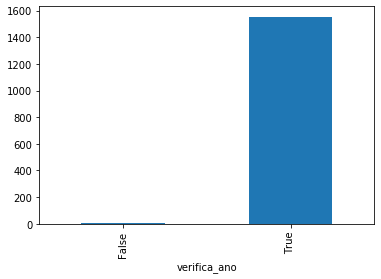

In [5]:
verifica_ano = df_campanhas_educativas_detran_2012_2019.groupby('verifica_ano')
verifica_ano.size().plot(kind = 'bar')

In [6]:
df_campanhas_educativas_detran_2012_2019.head()

,Campanha,Objetivos da Campanha,Data de Início da campanha,Data Final da Campanha,Local do Evento da Campanha,Região Administrativa do Evento da Campanha,Qtd de Motoristas Abordados no Evento,Qtd de Pedestres Abordados no Evento,Qtd De Motociclistas Abordados no Evento,Qtd de Ciclistas Abordados no Evento,Data Inicial do Evento da Campanha,Hora Inicial do Evento da Campanha,Data Final do Evento da Campanha,Hora Final do Evento da Campanha,Relatório do Evento,Rodovia,verifica_ano,Ano
0,GECED - BLITZEN NOTURNAS,Campanha Educativa de entrega de folder Alcool...,2015-11-27,2015-10-27 00:00:00.000,BR 070,--,700,0,0,0,2012-01-06,00:00:00:00,2012-01-06,00:00:00:00,NaN,NaN,False,2015
1,Operação Funil,"Álcool e direção, conscientização de motoristas.",2012-01-10,2012-01-10 00:00:00.000,BR 040 - Posto da Polícia Rodoviária Federal,--,300,0,0,0,2012-01-10,00:00:00:00,2012-01-10,00:00:00:00,NaN,NaN,True,2012
2,Operação Funil,Abordagem de carros. Operação iniciada ás 15:3...,2012-01-12,2012-01-12 00:00:00.000,BR 251/ DF 001 - Saída para Unaí,--,448,0,0,0,2012-01-12,00:00:00:00,2012-01-12,00:00:00:00,NaN,NaN,True,2012
3,Operação Funil,Abordagem de carros iniciando ás 15h e finaliz...,2012-01-19,2012-12-30 00:00:00.000,CPRV BR 060 - Samambaia,--,550,0,0,0,2012-01-19,00:00:00:00,2012-01-19,00:00:00:00,NaN,NaN,True,2012
4,Operação Funil,Abordagem de carros.,2012-01-06,2012-12-30 00:00:00.000,BR 020 Posto da BPRv,--,0,0,0,0,2012-01-20,00:00:00:00,2012-01-20,00:00:00:00,NaN,NaN,True,2012


### Observações
* Campanhas apresentam números irregulares no decorrer dos últimos anos

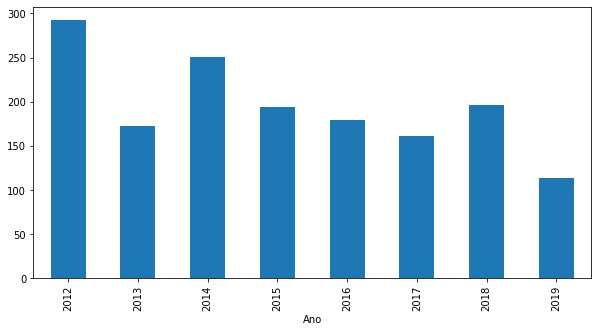

In [62]:
numero_de_campanhas_por_regiao = df_campanhas_educativas_detran_2012_2019.groupby('Ano')
numero_de_campanhas_por_regiao.size().plot(kind = 'bar')
#sns.countplot(df_campanhas_educativas_detran_2012_2019.index, data = df_campanhas_educativas_detran_2012_2019)

### Observações
* Grande parte das campanhas aconteceram em rodovias que não pertencem a uma única RA, não sendo possível a classificação

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

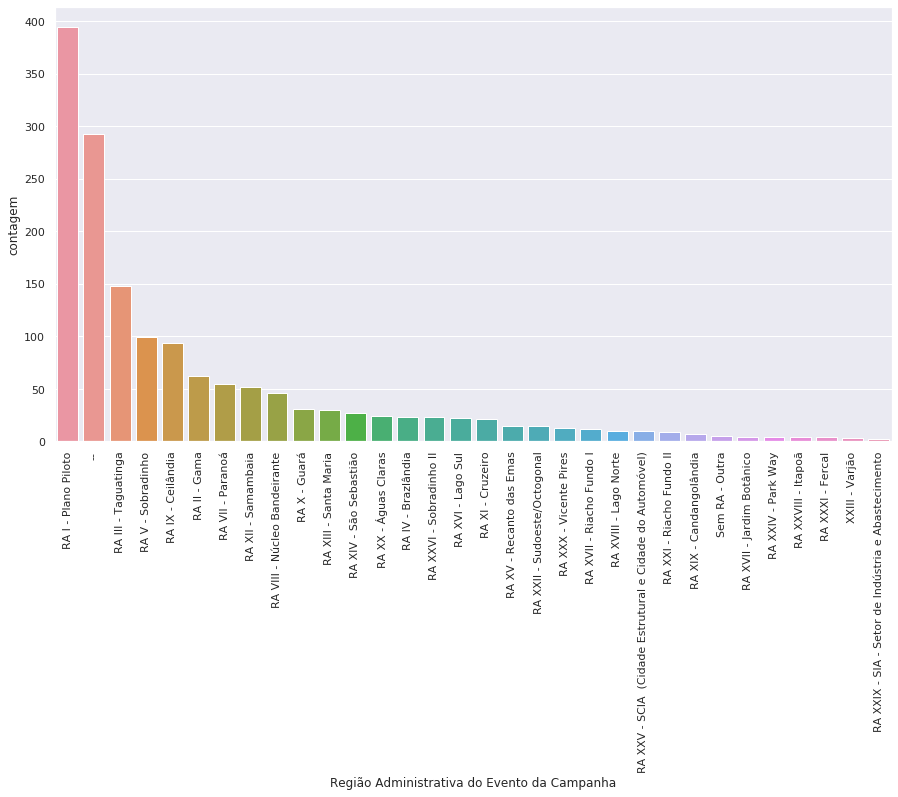

In [92]:
numero_de_campanhas_por_regiao = df_campanhas_educativas_detran_2012_2019.groupby('Região Administrativa do Evento da Campanha')
numero_de_campanhas_por_regiao = numero_de_campanhas_por_regiao.size().reset_index(name = 'contagem')
numero_de_campanhas_por_regiao = numero_de_campanhas_por_regiao.sort_values('contagem', ascending = False)

regioes = numero_de_campanhas_por_regiao['Região Administrativa do Evento da Campanha']
contagem = numero_de_campanhas_por_regiao['contagem']

sns.barplot(x = regioes, y = contagem, data = numero_de_campanhas_por_regiao)
plt.xticks(rotation = 90)


### Identificação das regiões do DF com o maior número de acidentes fatais de trânsito

* As 5 regiões com o maior número de acidentes são Ceilândia, Brasília (Plano Piloto), Taguatinga, Samambaia e Santa Maria

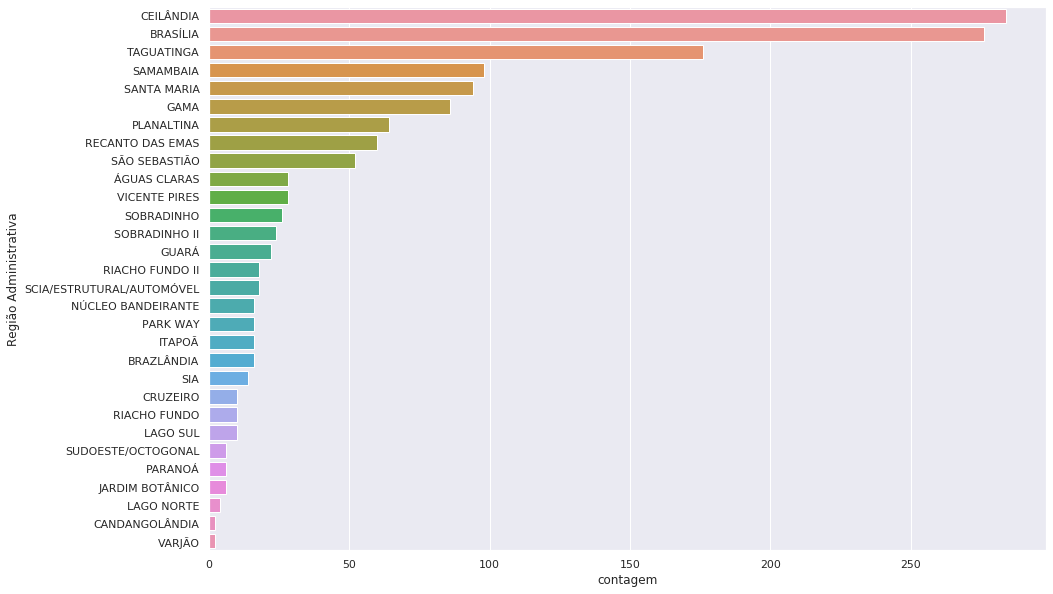

In [161]:
df_acidentes_fatais_2008_2017['Ano'] = df_acidentes_fatais_2008_2017['Ano'].astype(int)
df_acidentes_fatais_2012_2017 = df_acidentes_fatais_2008_2017[df_acidentes_fatais_2008_2017.Ano >= 2012]

acidentes_fatais_por_regiao = df_acidentes_fatais_2012_2017.groupby('Região Administrativa').size().reset_index(name = 'contagem')
acidentes_fatais_por_regiao = acidentes_fatais_por_regiao.sort_values('contagem', ascending = False)
contagem = acidentes_fatais_por_regiao['contagem']
regioes = acidentes_fatais_por_regiao['Região Administrativa']

sns.barplot(x = contagem, y = regioes, data = acidentes_fatais_por_regiao)


### Identifica quais são as naturezas dos principais tipos de acidentes

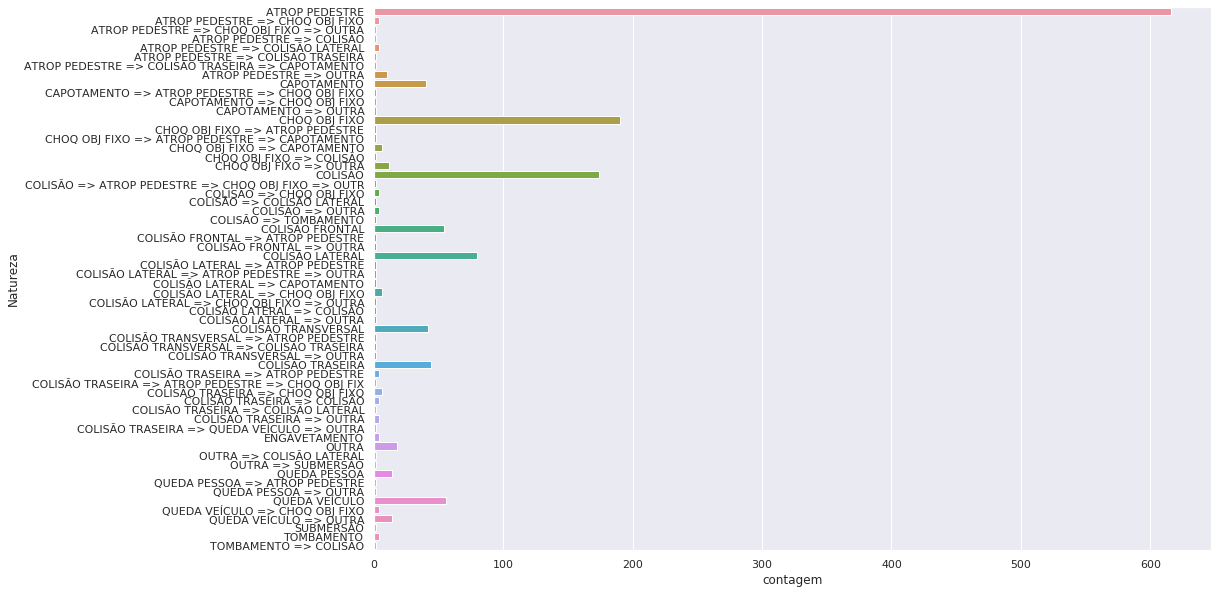

In [103]:
principais_tipos_acidentes_fatais = df_acidentes_fatais_2012_2019.groupby('Natureza').size().reset_index(name = 'contagem')
contagem_dos_acidentes = principais_tipos_acidentes_fatais['contagem']
natureza_dos_acidentes = principais_tipos_acidentes_fatais['Natureza']

sns.barplot(y = natureza_dos_acidentes, x = contagem_dos_acidentes, data = principais_tipos_acidentes_fatais)

### Observações
* Os diferentes tipos de natureza não estão contidos em subgrupos dos tipos de natureza de acidentes de alto nível
* Principais tipos de acidentes fatais de 2012 a 2019
* Certas sequências específicas ficam com poucos dados, devido a ordem das naturezas do acidentes

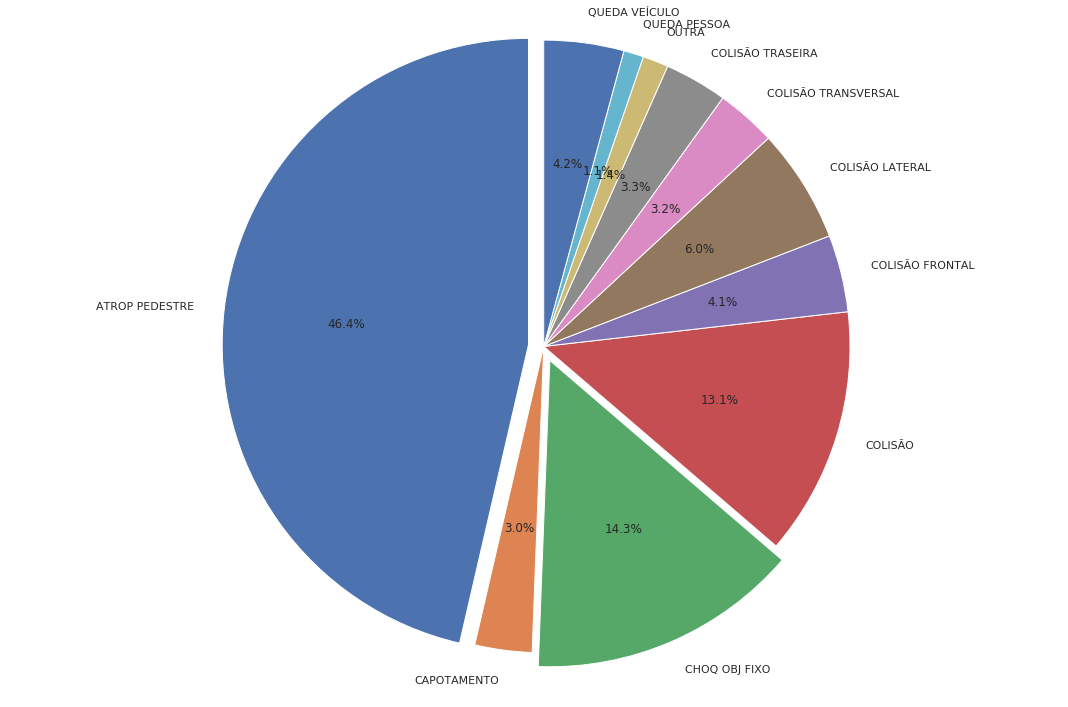

In [117]:
whitelist = ['ATROP PEDESTRE', 'CAPOTAMENTO', 'CHOQ OBJ FIXO', 'COLISÃO', 'COLISÃO FRONTAL', 'COLISÃO LATERAL', 'COLISÃO TRANSVERSAL', 'COLISÃO TRASEIRA', 'QUEDA VEÍCULO', 'QUEDA PESSOA', 'OUTRA']
principais_tipos_acidentes_fatais = principais_tipos_acidentes_fatais[principais_tipos_acidentes_fatais.Natureza.isin(whitelist)]

labels = principais_tipos_acidentes_fatais['Natureza']
sizes = principais_tipos_acidentes_fatais['contagem']

explode = (0.05, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', startangle = 90)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

### Observações
* Número de acidentes com vítimas fatais diminuiu drasticamente no intervalo dos anos 2016-2017
* Em comparação com os maiores números de campanhas os anos seguintes não apresentaram diminuições significantes no número de acidentes
* Em contraste com as outras principais cidades o Gama apresentou um índice alto de acidentes fatais no intervalo 2016-2017

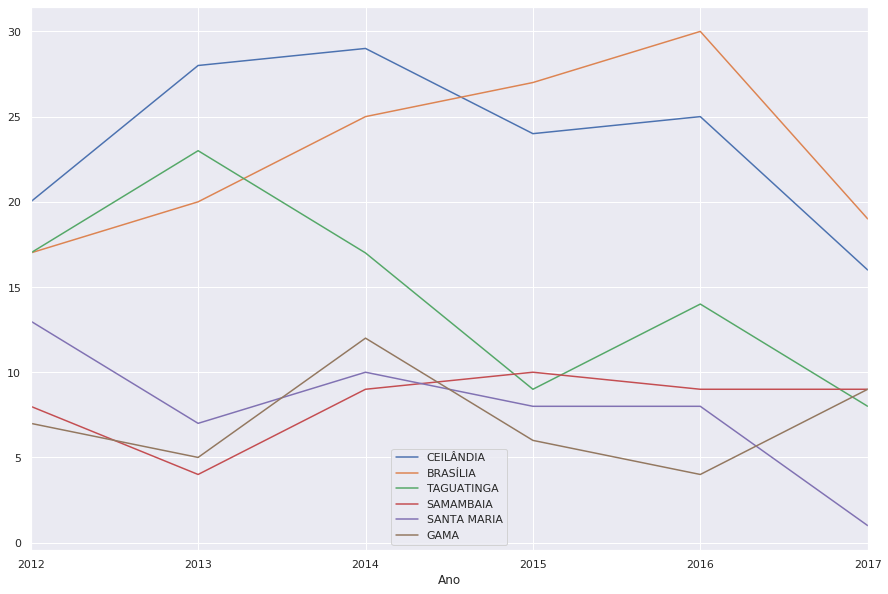

In [212]:
acidentes_fatais_por_ano = df_acidentes_fatais_2012_2017.groupby(['Ano', 'Região Administrativa']).size().unstack()

for cidade in acidentes_fatais_por_ano.columns:
    acidentes_fatais_por_ano[cidade] = (acidentes_fatais_por_ano[cidade].fillna(0).astype(int) / 2)


cidades_com_mais_acidentes = ['CEILÂNDIA', 'BRASÍLIA', 'TAGUATINGA', 'SAMAMBAIA', 'SANTA MARIA', 'GAMA']

for cidade in cidades_com_mais_acidentes:
    acidentes_fatais_por_ano[cidade].plot()
    leg = plt.legend()   

In [81]:
acidentes_rodovias_por_ano = df_acidentes_rodovias_2010_2019[df_acidentes_rodovias_2010_2019.classificacao_acidente == "Com Vítimas Fatais"].groupby('ano').size()

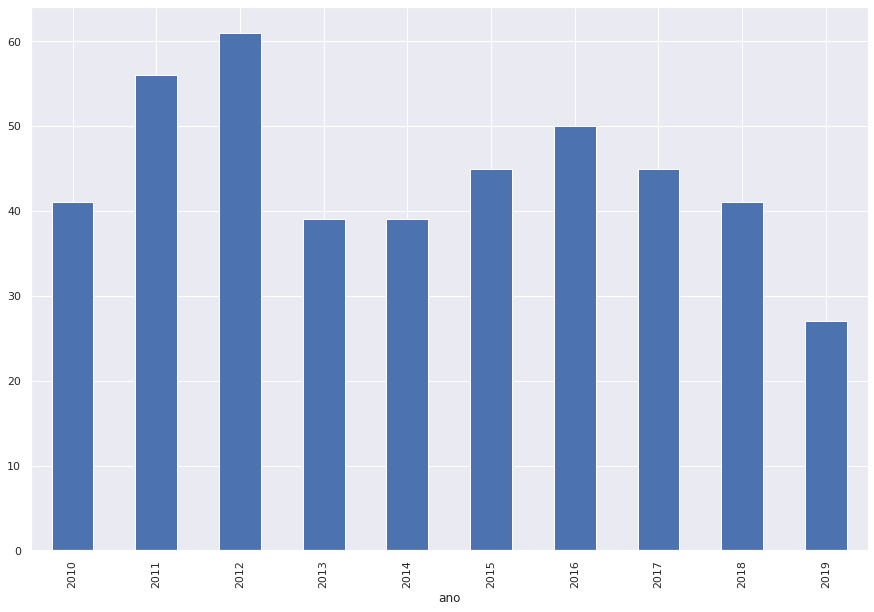

In [82]:
acidentes_rodovias_por_ano.plot(kind = 'bar')

In [80]:
df_acidentes_rodovias_2010_2019

,data_inversa,dia_semana,horario,uf,br,km,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,uso_solo,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,2010-02-04,Sexta,09:30:00,DF,60,13.2,Outras,Capotamento,Com Vítimas Feridas,Pleno dia,...,Rural,2010,6,0,4,1,0,1,5,1
1,2010-01-01,Sexta,16:50:00,DF,20,55,Outras,Saída de Pista,Com Vítimas Feridas,Pleno dia,...,Rural,2010,1,0,1,0,0,0,1,1
2,2010-04-01,Segunda,07:52:00,DF,20,2.8,Falta de atenção,Colisão traseira,Sem Vítimas,Pleno dia,...,Urbano,2010,2,0,0,0,2,0,0,2
3,2010-04-01,Segunda,10:50:00,DF,40,2.4,Ingestão de álcool,Colisão lateral,Sem Vítimas,Pleno dia,...,Urbano,2010,2,0,0,0,2,0,0,2
4,2010-05-01,Terça,14:05:00,DF,450,36,Falta de atenção,Colisão lateral,Sem Vítimas,Pleno dia,...,Rural,2010,5,0,0,0,5,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11806,2019-07-28,domingo,17:00:00,DF,80,25,Não guardar distância de segurança,Colisão traseira,Com Vítimas Feridas,Pleno dia,...,Sim,2019,6,0,1,0,5,0,1,2
11807,2019-07-28,domingo,17:40:00,DF,70,10.8,Desobediência às normas de trânsito pelo condutor,Colisão traseira,Com Vítimas Feridas,Anoitecer,...,Sim,2019,3,0,1,0,2,0,1,2
11808,2019-07-29,segunda-feira,07:30:00,DF,40,5,Falta de Atenção à Condução,Colisão traseira,Sem Vítimas,Pleno dia,...,Sim,2019,2,0,0,0,0,2,0,2
11809,2019-07-31,quarta-feira,12:47:00,DF,40,2.7,Desobediência às normas de trânsito pelo condutor,Colisão lateral,Com Vítimas Feridas,Pleno dia,...,Sim,2019,3,0,1,0,2,0,1,3
